In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r'C:\Users\20224751\Downloads\SN_TEST.csv'

df = pd.read_csv(file_path)

print(df.to_string()) 

C:\Users\20224751\AppData\Local\Temp\ipykernel_48636\3052440728.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   time    Area
0     5  0.4924
1     7  0.7988
2    10  1.5420
3    15  2.7320
4    20  3.5900
5    25  4.2670
6    30  4.6720
7    40  5.3720
8    50  5.6860
9    60  6.1920


In [2]:
df.columns = [col.strip() for col in df.columns]
print(df.columns)
print(df)

Index(['time', 'Area'], dtype='object')
   time    Area
0     5  0.4924
1     7  0.7988
2    10  1.5420
3    15  2.7320
4    20  3.5900
5    25  4.2670
6    30  4.6720
7    40  5.3720
8    50  5.6860
9    60  6.1920


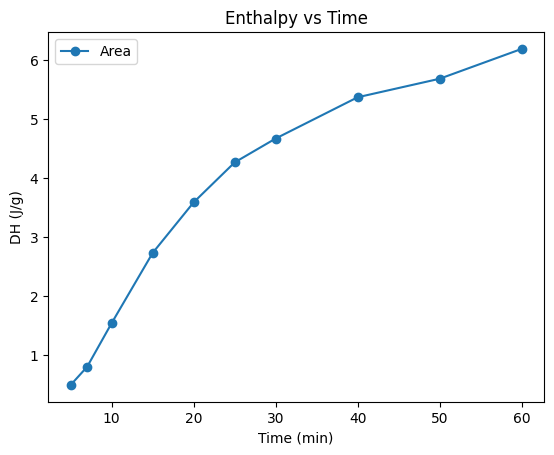

In [3]:
df.plot(x='time', y='Area', marker='o', linestyle='-')
plt.xlabel('Time (min)')
plt.ylabel('DH (J/g)')
plt.title('Enthalpy vs Time')
plt.show()

In [5]:
t_data = np.array(df['time'])
a_data = np.array(df['Area'])

In [6]:
# Define the DH function
def DH(t_data, DHinf, k, tzero, n):
    return DHinf * (1 - np.exp(-k * np.abs(t_data - tzero)**n))

In [ ]:
# Provide initial guess
initial_guess = (6.19, 0.05, 1, 1)

In [7]:
# Scipy.optimize.curve_fit(f, xdata, ydata, p0=None)
params, covariance = curve_fit(DH, t_data, a_data, p0=initial_guess)

# Fitted parameters estraction 
DHinf_fit, k_fit, tzero_fit, n_fit = params

In [8]:
# Display fit parameters
print("Fitted DHinf:", DHinf_fit)
print("Fitted k:", k_fit)
print("Fitted tzero:", tzero_fit)
print("Fitted n:", n_fit)

Fitted DHinf: 6.336688800914219
Fitted k: 0.03746379769925092
Fitted tzero: 3.3833286760572787
Fitted n: 1.0953337477826077


In [9]:
print(covariance)

[[ 5.53460375e-02  2.26454834e-03  1.17459431e-01 -2.38591925e-02]
 [ 2.26454834e-03  1.81008264e-04  1.01857948e-02 -1.63763997e-03]
 [ 1.17459431e-01  1.01857948e-02  6.55480283e-01 -8.94053596e-02]
 [-2.38591925e-02 -1.63763997e-03 -8.94053596e-02  1.53193418e-02]]


In [ ]:
def fitted_DH(t_data):
    return DH(t_data, DHinf_fit, k_fit, tzero_fit, n_fit)

In [ ]:
# Plot the original data and the fitted function
plt.scatter(t_data, a_data, label='Data')
t_values = np.linspace(min(t_data), max(t_data), 19)
plt.plot(t_values, fitted_DH(t_values), label='Fitted DH Function', color='red')
plt.xlabel('Time (min)')
plt.ylabel('DH (J/g)')
plt.title('Enthalpy vs Time Fit')
plt.legend()
plt.show()

In [10]:
x = np.abs(t_data - tzero_fit)
y = np.log(1 - a_data / DHinf_fit)

[ 1.61667132  3.61667132  6.61667132 11.61667132 16.61667132 21.61667132
 26.61667132 36.61667132 46.61667132 56.61667132]
[-0.08089145 -0.13474302 -0.27884756 -0.56412092 -0.83596025 -1.1189581
 -1.33671816 -1.88230608 -2.27608014 -3.7795264 ]


LINEAR MODEL

In [38]:
def LogDHn(x, k_lin, n_lin):
    return -k_lin * np.abs(x**n_lin)

In [40]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
print(coef)

[-0.0657299   0.22317293]


Text(0.5, 1.0, 'Linear fit')

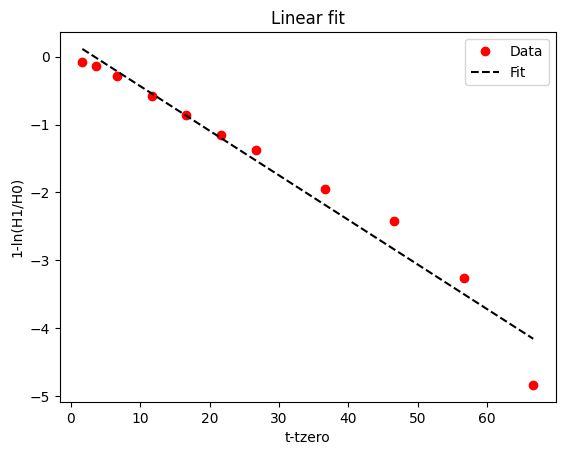

In [41]:
plt.plot(x,y, 'ro', label='Data')
plt.plot(x, poly1d_fn(x), '--k', label='Fit')
plt.legend()
plt.xlabel('t-tzero')
plt.ylabel('1-ln(H1/H0)')
plt.title('Linear fit')